In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error

In [2]:
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Reading the csv file using pandas
data = pd.read_csv(data_url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We note the maximum values of our columns

Text(0, 0.5, 'Scores Obtained (%)')

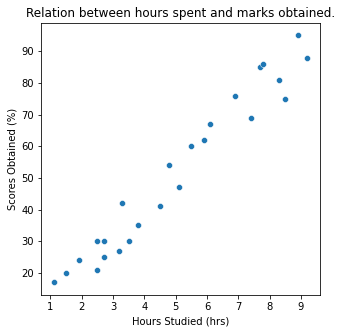

In [6]:
plt.figure(figsize=(5,5))
plt.title("Relation between hours spent and marks obtained.")
sns.scatterplot(x="Hours", y="Scores", data=data)
plt.xlabel("Hours Studied (hrs)")
plt.ylabel("Scores Obtained (%)")

We can see a linear relation between hours studied and marks obtained. The relation is strong and positive.

We can also plot a regression line for our scatter plot.

Text(0, 0.5, 'Scores Obtained (%)')

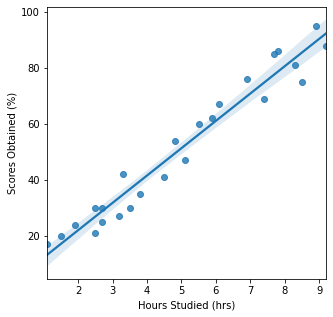

In [7]:
plt.figure(figsize=(5,5))
sns.regplot(x="Hours", y="Scores", data=data)
plt.xlabel("Hours Studied (hrs)")
plt.ylabel("Scores Obtained (%)")

In [8]:
# We need to transform our data into a 2D array to train our model and 
# make predictions.

features = data["Hours"].values.reshape(-1,1)
targets = data["Scores"].values.reshape(-1,1)

Now we import train test split to split our dataset into training set and test set. We build our model using the training set and evaluate it using test set.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42)

## K nearest neighbor regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
# Training or KNN model with 1 nearest neighbor for optimal result
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_test, y_test)
# Predicting the scores for our test set
y_pred = knn.predict(X_test)

# Finding the mean absolute error for KNN
knn_error = mean_absolute_error(y_test, y_pred)

# Printing our test set and training set scores
print("Training score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test, y_test)))
print(f"Mean absolute error: {knn_error:.3f}")

# Predicting the score for given value
hours = [[9.25]] # need 2d array for prediction
knn_pred = float(knn.predict(hours))
print(f"\nThe predicted score for studying 9.25 hours a day is: {knn_pred} %.")

Training score: 0.876
Test score: 0.978
Mean absolute error: 1.286

The predicted score for studying 9.25 hours a day is: 81.0 %.


## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_test, y_test)
# Predicting the scores for our test set
y_pred = lr.predict(X_test)

# Finding the mean absolute error for KNN
lr_error = mean_absolute_error(y_test, y_pred)

# Printing our test set and training set scores
print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))
print(f"Mean absolute error: {lr_error:.3f}")

# Predicting the score for given value
hours = [[9.25]] # need 2d array for prediction
lr_pred = float(lr.predict(hours))
print(f"\nThe predicted score for studying 9.25 hours a day is: {lr_pred:.2f} %.")

Training score: 0.947
Test score: 0.959
Mean absolute error: 4.239

The predicted score for studying 9.25 hours a day is: 95.16 %.


## Ridge Regression

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.05)
ridge.fit(X_test, y_test)
# Predicting the scores for our test set
y_pred = ridge.predict(X_test)

# Finding the mean absolute error for KNN
ridge_error = mean_absolute_error(y_test, y_pred)

# Printing our test set and training set scores
print("Training score: {:.3f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.3f}".format(ridge.score(X_test, y_test)))
print(f"Mean absolute error: {ridge_error:.3f}")

# Predicting the score for given value
hours = [[9.25]] # need 2d array for prediction
ridge_pred = float(ridge.predict(hours))
print(f"\nThe predicted score for studying 9.25 hours a day is: {ridge_pred:.2f} %.")

Training score: 0.947
Test score: 0.959
Mean absolute error: 4.240

The predicted score for studying 9.25 hours a day is: 95.10 %.


We can see here that using <b><u>Ridge Regression</u></b> doesnt improve our Test Score or decrease our Mean Absolute Error significatly from our Linear regression scores.

We dont use a tree model as our training data (which consists of hours spent studying) has a maximum of 9.2 hours. Since our test point (9.25hrs) is outside the range of our training data and given the fact that Tree models are incapable of making predictions on data outside the range of its training set. Thus, we dont use Tree Models.

In [14]:
model_data = {
    "Model": ['KNN Regressor', 'Linear Regression', 'Ridge'],
    "Score": [knn_pred, lr_pred, ridge_pred],
    "Mean Error": [knn_error, lr_error, ridge_error]
}

predictions = pd.DataFrame(model_data, columns=["Model", "Score", "Mean Error"], )

In [15]:
predictions

,Model,Score,Mean Error
0,KNN Regressor,81.000000,1.285714
1,Linear Regression,95.164956,4.238924
2,Ridge,95.097470,4.239987


Here we see that our Linear Models predicted around 95% as the marks that should be obtained by studying 9.25 hours while our KNN model had a lower prediction of around 81%. The mean absolute error was higher for the linear models compared to our KNN model. Given the linear relation between hours studied and marks obtained and our Linear model predictions, we can estimate that a student who studied 9.25 hours, should score around 95%.